# Guided Project: Finding the best market to advertise in

### What the project is about:
* This project is about a hypothetical case of an e-learning company, DevQuest. The company wants to promote its product overseas.

### What my goal is in this project:
* The main goal of this project is to find out the two best markets to advertise in, maximizing benefit-to-cost.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

## Understanding the data
To save money on organzing own survey, I will make use of another survey done by freeCodeCamp in 2017.

You can find out more about the freeCodeCamp's 2017 New Coder Survey in [this GitHub repo](https://github.com/freeCodeCamp/2017-new-coder-survey)

The dataset I will be analyzing is named *2017-fCC-New-Coders-Survey-Data.csv* file stored in the clean-data folder in the above repo.

In [7]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [9]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [6]:
df.dtypes

Age                       float64
AttendedBootcamp          float64
BootcampFinish            float64
BootcampLoanYesNo         float64
BootcampName               object
BootcampRecommend         float64
ChildrenNumber            float64
CityPopulation             object
CodeEventConferences      float64
CodeEventDjangoGirls      float64
CodeEventFCC              float64
CodeEventGameJam          float64
CodeEventGirlDev          float64
CodeEventHackathons       float64
CodeEventMeetup           float64
CodeEventNodeSchool       float64
CodeEventNone             float64
CodeEventOther             object
CodeEventRailsBridge      float64
CodeEventRailsGirls       float64
CodeEventStartUpWknd      float64
CodeEventWkdBootcamps     float64
CodeEventWomenCode        float64
CodeEventWorkshops        float64
CommuteTime                object
CountryCitizen             object
CountryLive                object
EmploymentField            object
EmploymentFieldOther       object
EmploymentStat

## Checking for sample representativity

For the purpose of my analysis, I want to explore the population of new coders that might be interested in the courses DevQuest offers.

First, I need to check whether the data set has the right categories of people. The JobRoleInterest column describes the roles each person in the population is interested in working in. So, let's take a look at the frequency table of this column.

In [10]:
df['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                      11.770595
  Front-End Web Developer                                                                                                                                                                                      6.435927
  Data Scientist                                                                                                                                                                                               2.173913
Back-End Web Developer                                                                                                                                                                                         2.030892
  Mobile Developer                                                                                                                      

It seems that many respondents are interested in more than one subject. I want to find out how many of them have only one interest and how many have more mixed interests.

In [29]:
# Drop NaNs and split interests
interests_dropna = df['JobRoleInterest'].dropna()
splitted_interests = job_int_dropna.str.split(',')

# Get frequency table for the number of interests
num_of_interests = splitted_interests.apply(lambda x: len(x))
num_of_interests.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests.

The focus of DevQuest's courses is on **web and mobile development**, so let's find out how many respondents chose at least one of these two options.

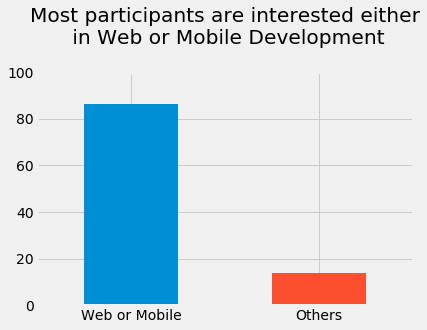

In [83]:
web_or_mobile = interests_dropna.str.contains('Web|Mobile')
perc_table = web_or_mobile.value_counts(normalize=True) *100

plt.style.use('fivethirtyeight')
perc_table.plot.bar(rot=0)
plt.ylim(0,100)
plt.title("Most participants are interested either\n in Web or Mobile Development\n")
plt.xticks([0,1], ['Web or Mobile', 'Others']);

Now, I can conclude that the sample has the right categories of people for my purpose

## Analysing the data

* Let's find out where people are located

In [92]:
# Let's use only the samples where we know what the person's interest is
survey = df[df['JobRoleInterest'].notnull()]

In [127]:
# Create a frequency table for column 'CountryLive' containing top 10 countries
country_abs_table = survey['CountryLive'].value_counts()[:10]
country_rel_table = survey['CountryLive'].value_counts(normalize=True)[:10] * 100

country_table = pd.DataFrame({'absolute frequency': country_abs_table,
                             'percentage': country_rel_table})
country_table

,absolute frequency,percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


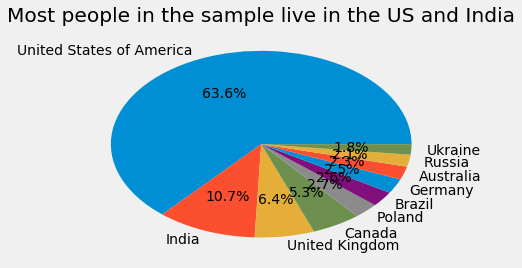

In [128]:
country_table.plot.pie('percentage', legend=False, autopct='%1.1f%%')
plt.ylabel('')
plt.title("Most people in the sample live in the US and India");

The US and India represent more than 74% among top 10 countries, so those two countries are likely the most interesting markets. Now let's go more in depth to find out if the people in those top countries are actually willing to invest money on learning.

## Willingness to invest money on learning

The MoneyForLearning column describes in USD the amount of money spent by participants from the moment they started coding until the moment they completed the survey. DevQuest sells subscriptions at a price of \$59 per month, and for this reason I'm interested in finding out how much money each student spends per month.

I'll narrow down my analysis to only four countries: the US, India, the United Kingdom, and Canada.

I'll create a new column money_per_month by dividing 'MoneyForLearning' column by 'MonthsProgramming' column. To do this I should replace zeros in the latter with ones.

In [145]:
# Replace zeros with ones in column 'MonthsProgramming'
survey['MonthsProgramming'].replace(0, 1, inplace=True)

# Create new column 'money_per_month'
survey['money_per_month'] = survey['MoneyForLearning'] / survey['MonthsProgramming']

# Drop rows with NaN in the new column
survey = survey.loc[survey['money_per_month'].notnull()]

# Remove rows with null values in CountryLive column
survey = survey.loc[survey['CountryLive'].notnull()]

In [151]:
# Calculate average 'mean_per_month' by country
country_mean = survey.groupby('CountryLive').mean()['money_per_month']
country_mean[['United States of America',
             'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The result shows that the US and India are likely the best two countries that DevQuest should advertise in. Meanwhile, it seems a bit surprising that a typical indian person spends more on learning per month than a typical person from the UK or Canada.

It might be that we don't have enough representative data or that there may be some outliers manipulating the means. Or it might also be right and Indian people are especially passionate about learning programming.

## Dealing with outliers

In [156]:
top4 = survey[survey['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

In [158]:
import seaborn as sns

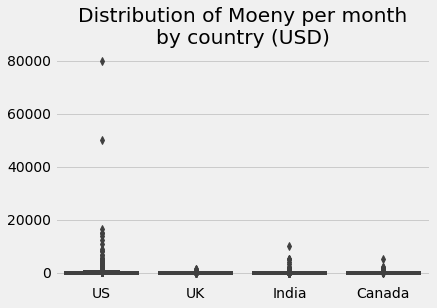

In [171]:
# Draw boxplots to find out if there are extreme outliers that are distorting the means
sns.boxplot(y='money_per_month', x='CountryLive', data=top4)
plt.title("Distribution of Moeny per month\nby country (USD)")
plt.ylabel('')
plt.xlabel('')
plt.xticks([0,1,2,3],['US','UK','India','Canada']);

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month.

In [172]:
top4 = top4[top4['money_per_month'] <= 20000]

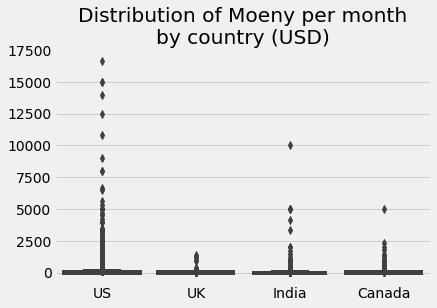

In [179]:
sns.boxplot(y='money_per_month', x='CountryLive', data=top4)
plt.title("Distribution of Moeny per month\nby country (USD)")
plt.ylabel('')
plt.xlabel('')
plt.xticks([0,1,2,3],['US','UK','India','Canada']);

Even after removing some insanely high numbers, I still have some very high numbers in United States and India. To explore each country and finding out the trustworthiness of the data is cumbersome. Instead, lets try using median in place of mean.

In [183]:
top4.groupby('CountryLive').median()['money_per_month']

CountryLive
Canada                      0.000000
India                       0.000000
United Kingdom              0.000000
United States of America    3.333333
Name: money_per_month, dtype: float64

Since majority of people spent absolutely no money on learning, medians do not provide me with an additional insight. Let's try with mean again. This time, I will remove rows where 'money_per_month' is above 5000.

In [190]:
top4 = top4[top4['money_per_month'] <= 5000]

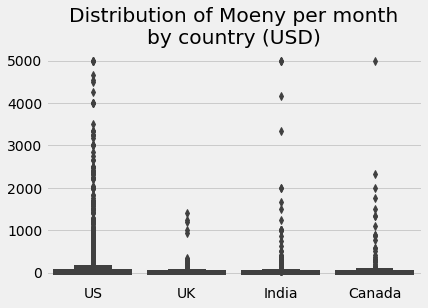

In [191]:
sns.boxplot(y='money_per_month', x='CountryLive', data=top4)
plt.title("Distribution of Moeny per month\nby country (USD)")
plt.ylabel('')
plt.xlabel('')
plt.xticks([0,1,2,3],['US','UK','India','Canada']);

In [195]:
top4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                      113.510961
India                       113.748387
United Kingdom               45.534443
United States of America    138.982678
Name: money_per_month, dtype: float64

## Choosing the best two market

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$140).

But it's not crystal clear what to choose between Canada and India.

## Conclusion

In this project, I analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. It may be a good idea to send the results to the marketing team so they can use their domain knowledge to take the best decision.